In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs

import seaborn as sns

# These are some parameters to make figures nice (and big)
xr.set_options(display_style='html')
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
plt.rcParams['figure.figsize'] = 12, 6
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [3]:
path='/data/keeling/a/cristi/a/data_processed/ERA5_JJA_daily/'
fname=path+'ERA5_JJA_daily_1979-2021_US48_18vars.nc'

In [4]:
ds=xr.open_dataset(fname)
t99= ds.t2m  .quantile(0.99, dim='time')
m20= ds.swvl1.quantile(0.2, dim='time')

heatwaves_all=ds.t2m.where(ds.t2m>t99)
heatwaves_dry=heatwaves_all.where(ds.swvl1<m20)


In [5]:
c=(len(ds.time)-heatwaves_dry.isnull().astype('int').sum(dim='time')
  )/(len(ds.time)-heatwaves_all.isnull().astype('int').sum(dim='time'))

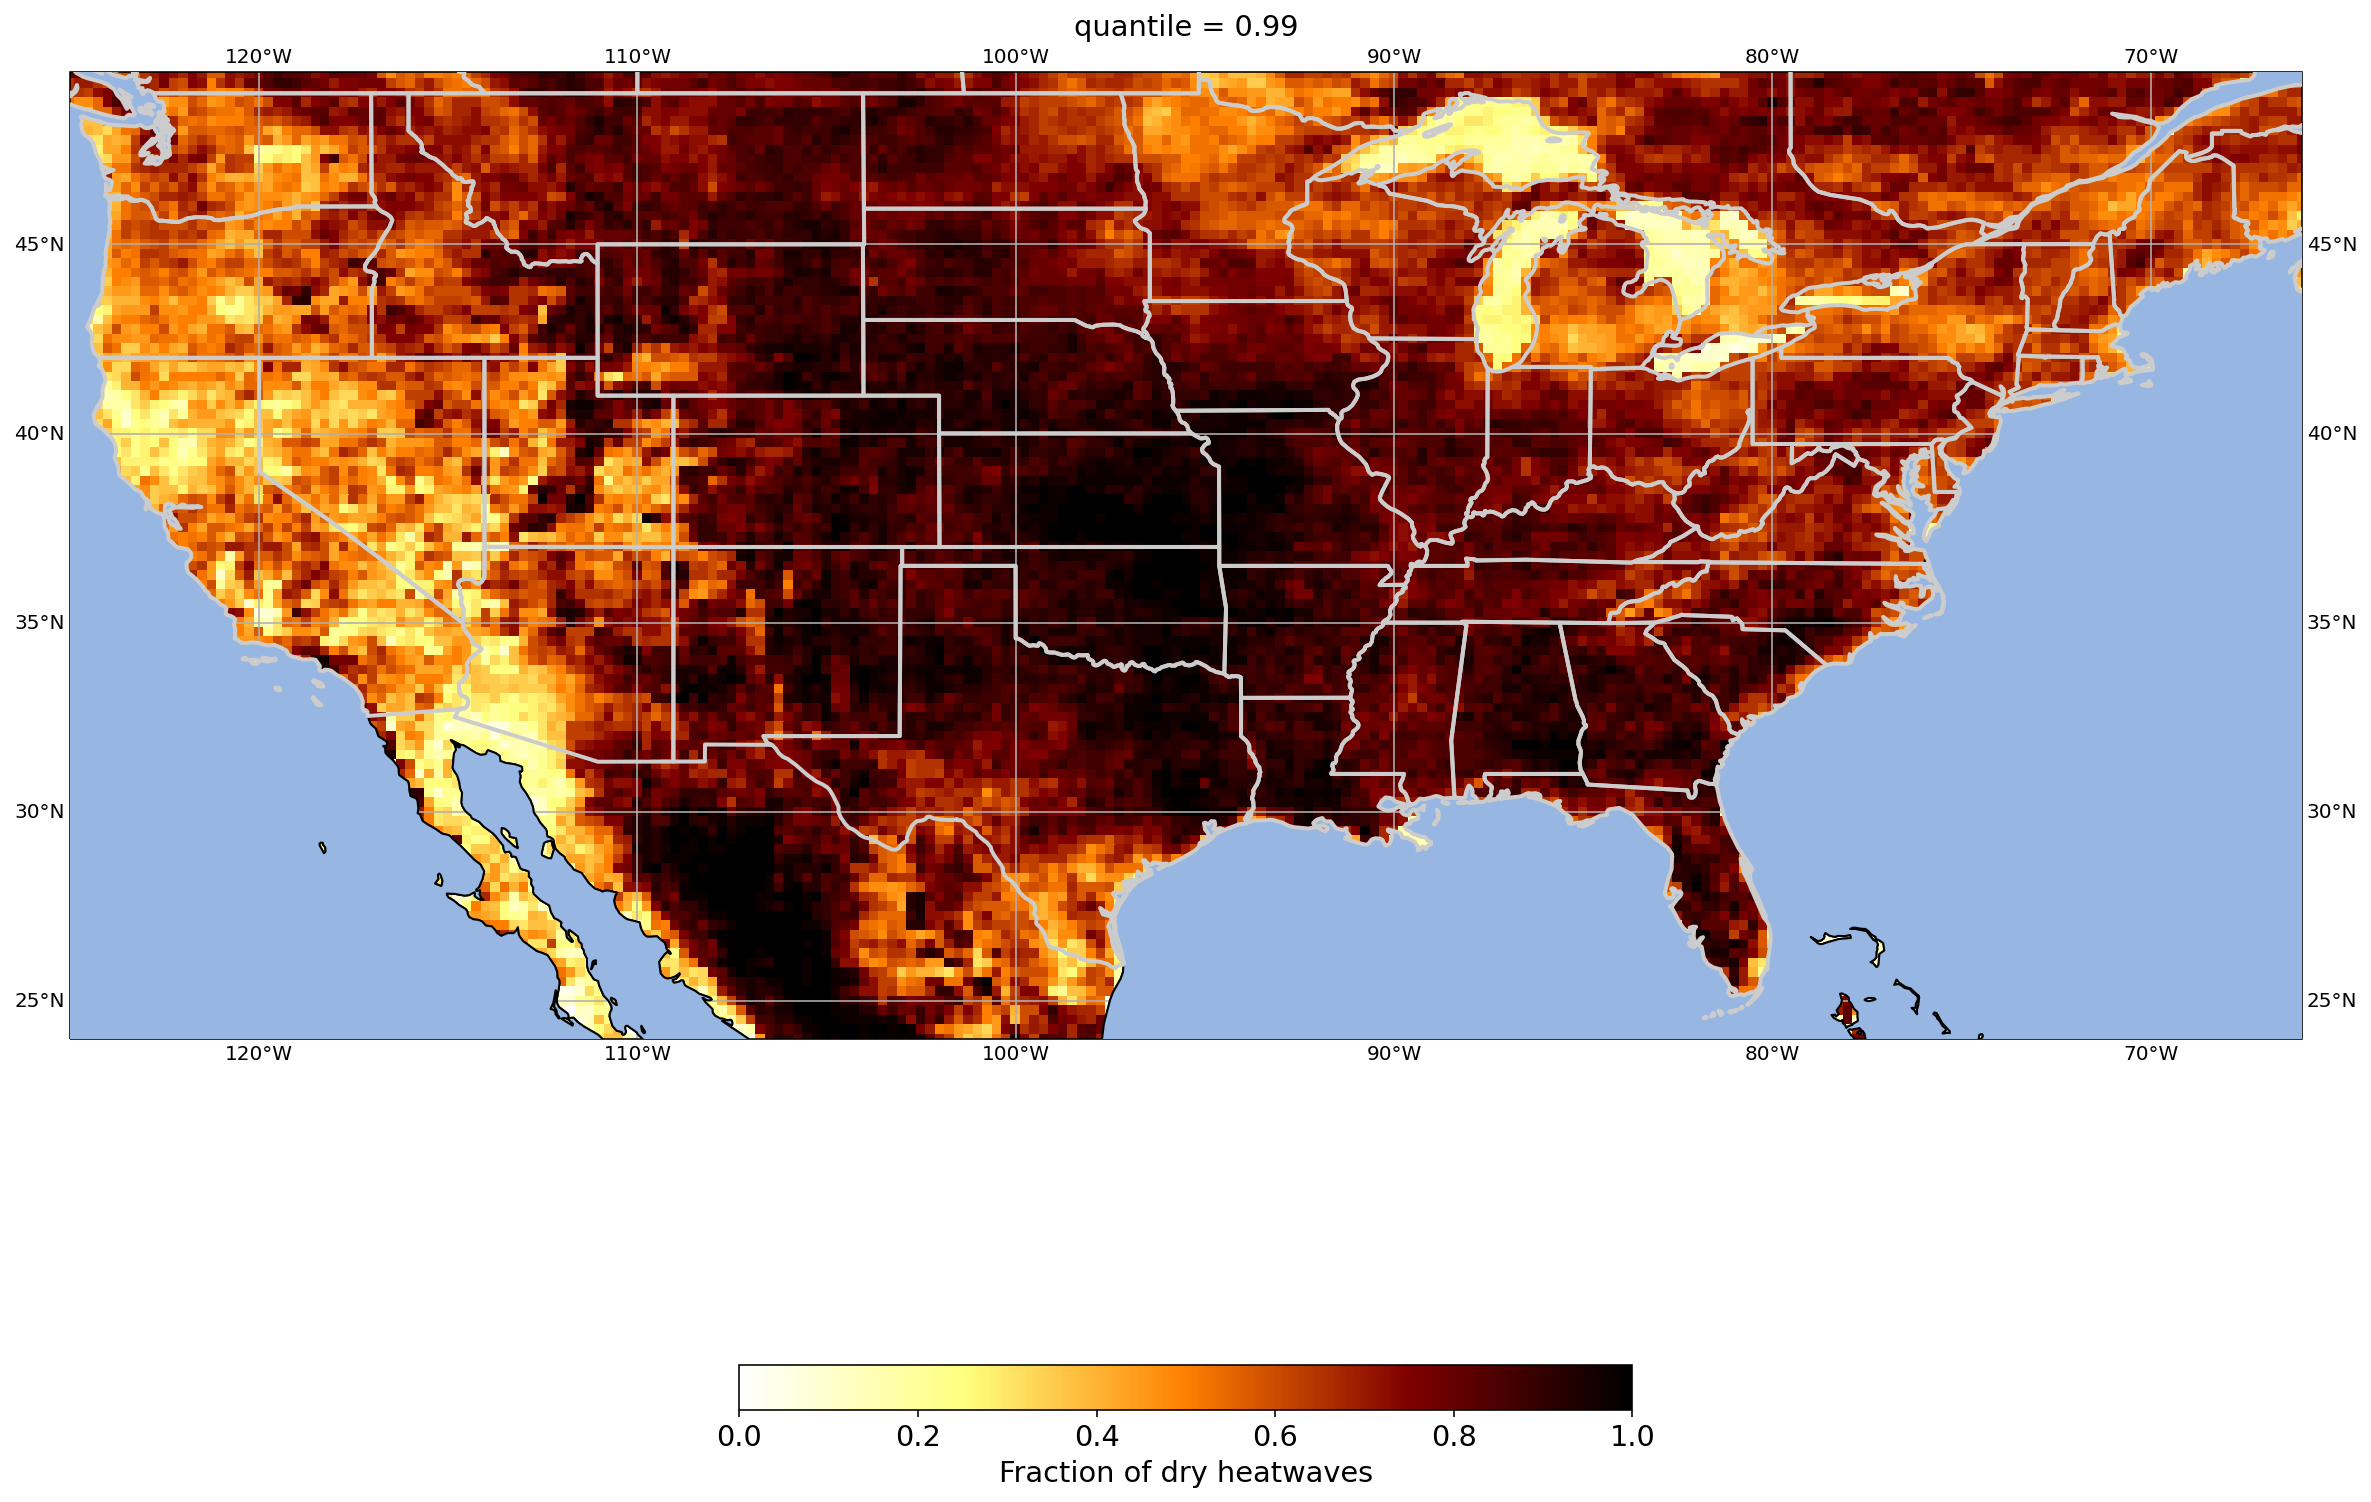

In [6]:
fig=plt.figure(figsize=(20,20))
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
ax.coastlines()
extent = [-125, -66, 46, 24]
ax.set_extent(extent)
ax.add_feature(cartopy.feature.OCEAN,zorder=100,edgecolor='k')    
ax.add_feature(cartopy.feature.STATES,zorder=100,edgecolor=[0.8,0.8,0.8],linewidth=2)    
ax.gridlines(draw_labels=True)
c.plot(ax=ax,transform=ccrs.PlateCarree(),cmap=plt.get_cmap('afmhot').reversed(),
              cbar_kwargs={'label':'Fraction of dry heatwaves','shrink':0.4,'orientation':'horizontal'},vmin=.0)


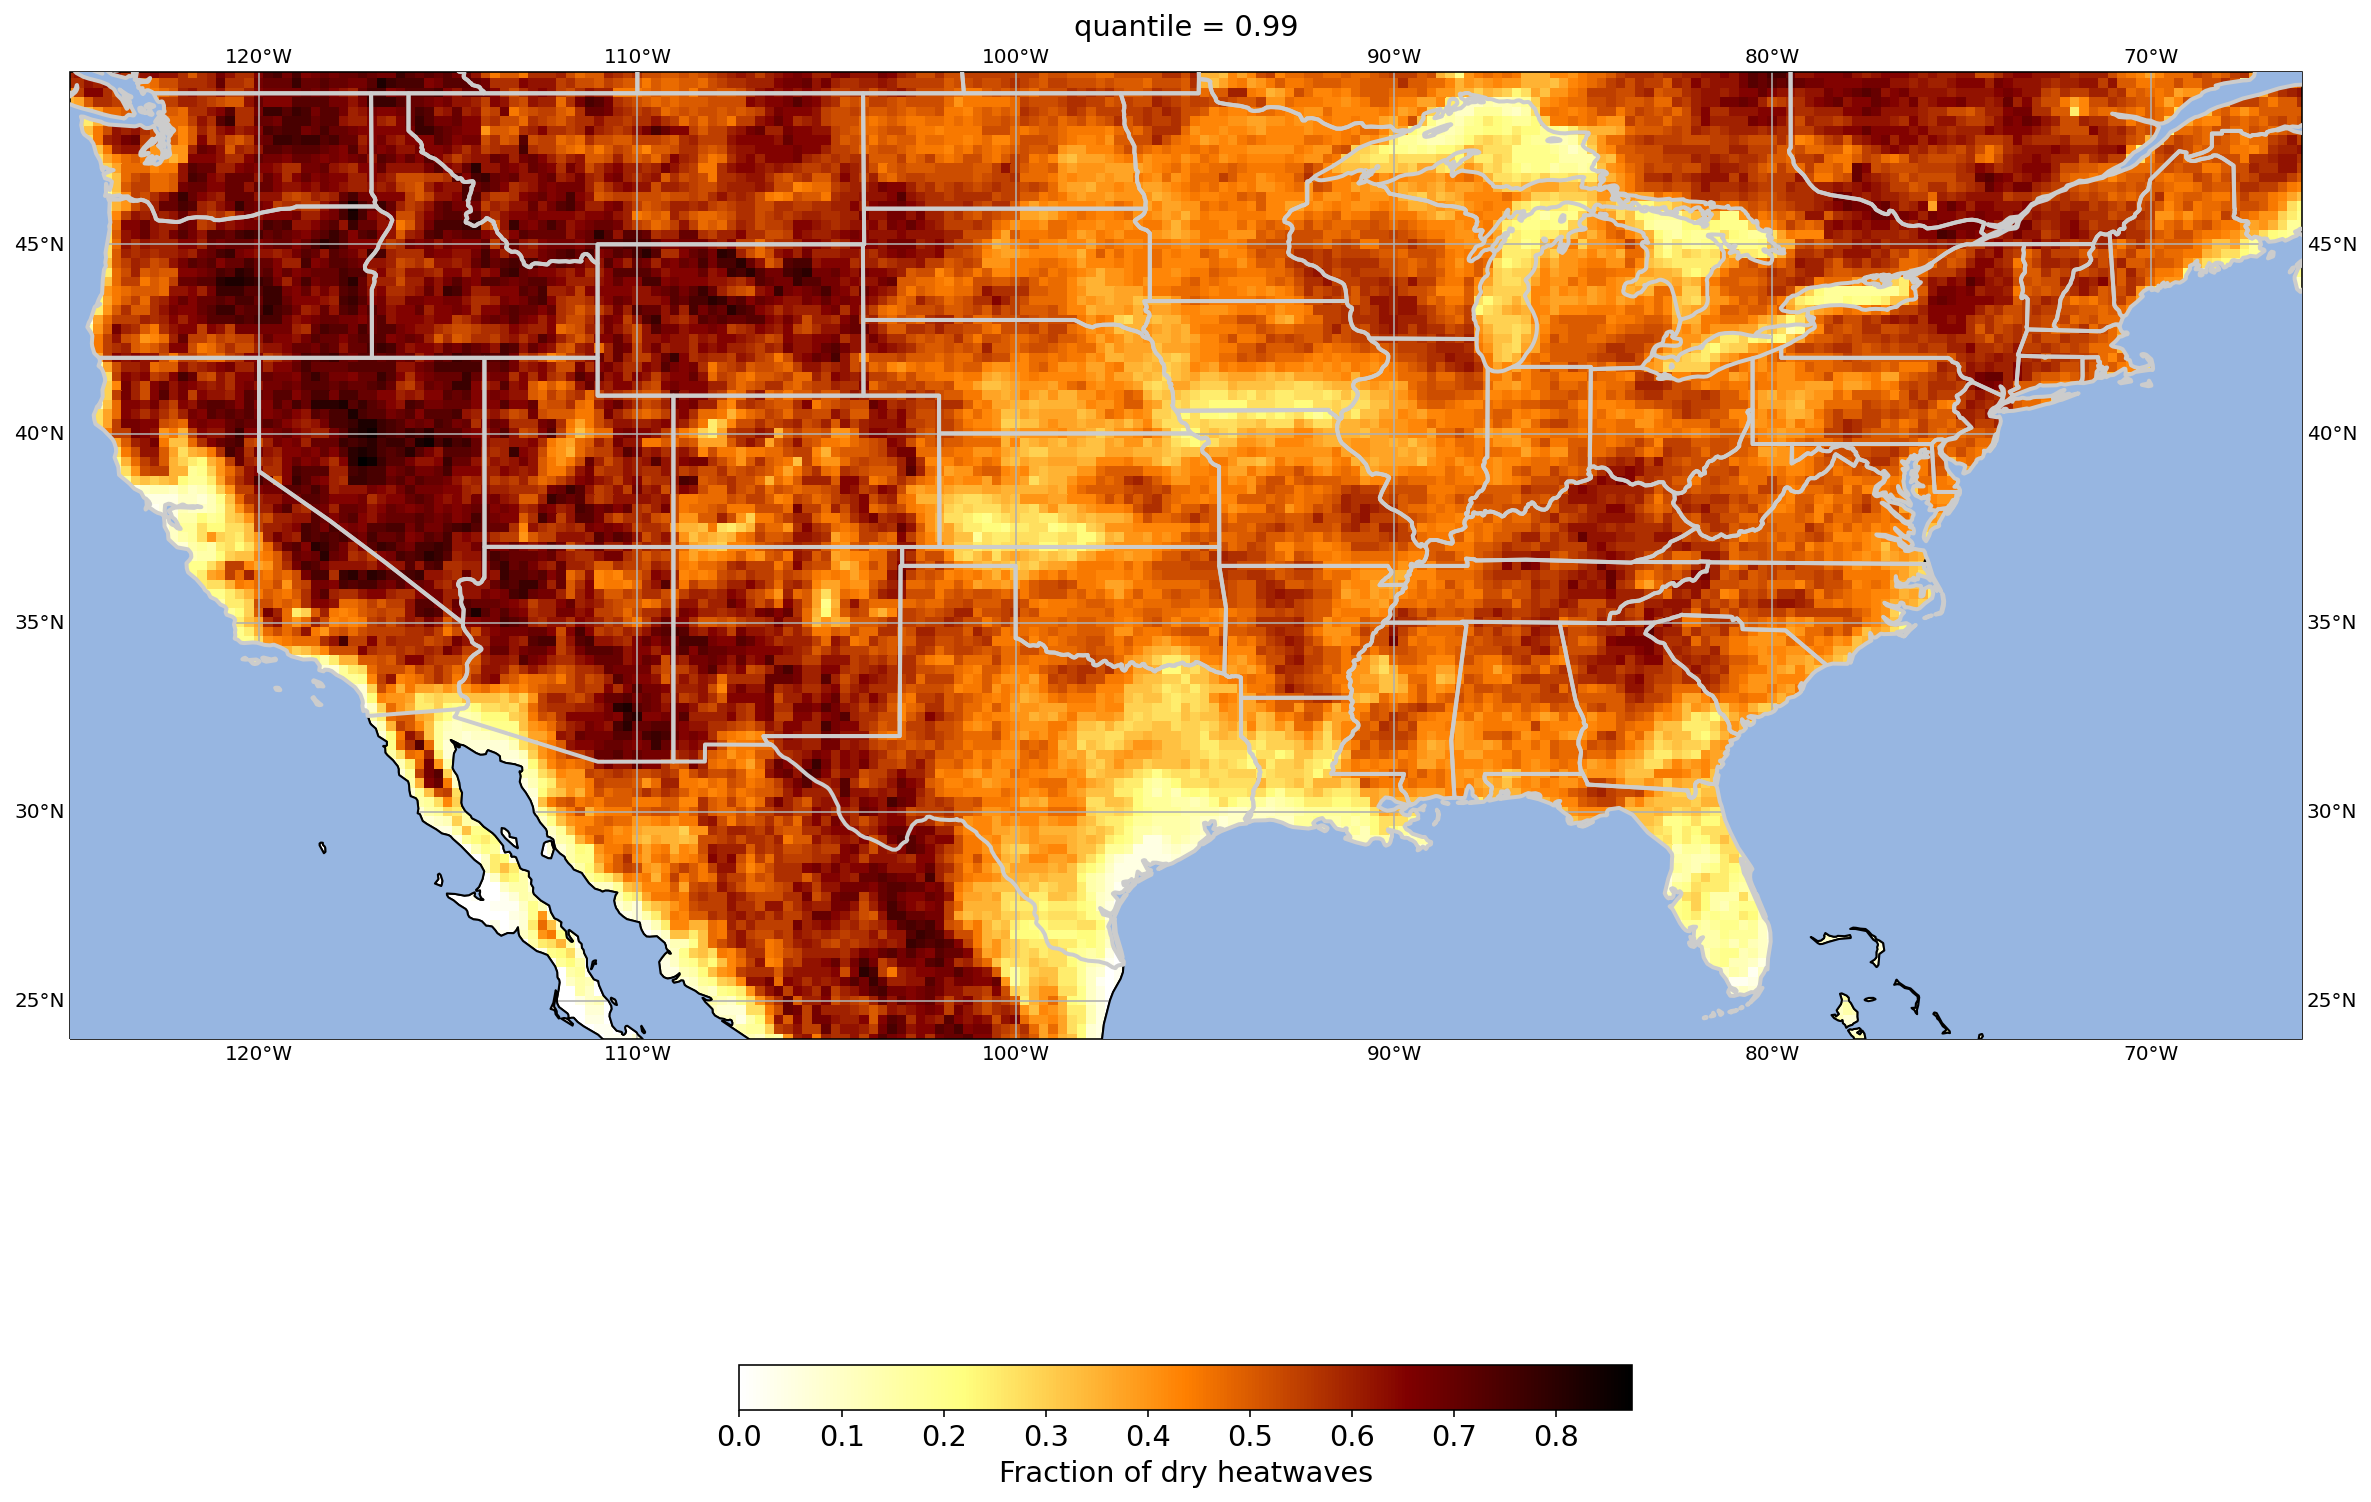

In [24]:
ds=xr.open_dataset(fname)
t99= ds.t2m  .quantile(0.99, dim='time')
m20= ds.t850.quantile(0.99, dim='time')

heatwaves_all=ds.t2m.where(ds.t2m>t99)
heatwaves_dry=heatwaves_all.where(ds.t850>m20)
c=(len(ds.time)-heatwaves_dry.isnull().astype('int').sum(dim='time')
  )/(len(ds.time)-heatwaves_all.isnull().astype('int').sum(dim='time'))

fig=plt.figure(figsize=(20,20))
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
ax.coastlines()
extent = [-125, -66, 46, 24]
ax.set_extent(extent)
ax.add_feature(cartopy.feature.OCEAN,zorder=100,edgecolor='k')    
ax.add_feature(cartopy.feature.STATES,zorder=100,edgecolor=[0.8,0.8,0.8],linewidth=2)    
ax.gridlines(draw_labels=True)
c.plot(ax=ax,transform=ccrs.PlateCarree(),cmap=plt.get_cmap('afmhot').reversed(),
              cbar_kwargs={'label':'Fraction of dry heatwaves','shrink':0.4,'orientation':'horizontal'},vmin=.0)
